# Comparing K-Means and DBSCAN Algorithms

**Elaborated By: Sirine MAAROUFI**

---

## **Introduction**

In this practical exercise, we will explore and compare two clustering algorithms: **K-Means and DBSCAN**. Both algorithms have different approaches to grouping data points, and we aim to understand their strengths and limitations by applying them to synthetic datasets.

---

### **Key Goals**
1. Generate two distinct datasets, normalize them, and visualize the data distribution.
2. Apply the K-Means algorithm to both datasets and observe how it clusters the data.
3. Apply the DBSCAN algorithm (with `eps=0.15` and `min_samples=4`) and evaluate its performance compared to K-Means.
4. Analyze and interpret the results for both algorithms, focusing on their performance on different types of data.

---



## **Data Generation and Normalization**
---

### **Introduction**
We begin by importing the necessary libraries and generating two synthetic datasets. The first dataset consists of randomly generated **blobs** (clusters), while the second dataset forms concentric **circles**, which are more challenging to cluster. Then, we will normalize and visualize our datasets.


---


### **Step 1: Importing Libraries**

In [1]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import make_blobs, make_circles
from sklearn.preprocessing import StandardScaler

### **Step 2: Data Generation**
We begin by generating two synthetic datasets using the `make_blobs()` and `make_circles()` functions from `sklearn.datasets`. 
    
* `make_blobs()` function creates clusters of points with a specified number of centers and spread. In our case, the dataset has **3 centers**, representing three distinct groups of points.

* `make_circles()` function creates a dataset with points arranged in concentric circles. Here, we generate two concentric circles, with the parameter `factor=0.5` and the parameter `noise=0.04` to add some noise to the data, making it more realistic.

In [2]:
# Generate the first dataset: blobs
X1, _ = make_blobs(n_samples=1000,random_state=6)

# Generate the second dataset: circles
X2, _ = make_circles(n_samples=1000, noise=0.04, factor=0.5, random_state=0)

### **Step 3: Normalization**
Before applying clustering algorithms, it is essential to normalize the datasets. Both K-Means and DBSCAN rely on distance calculations; K-Means uses Euclidean distance to minimize within-cluster variance, while DBSCAN defines the neighborhood of a point based on a distance threshold (`eps`).

Without normalization, features with larger scales could dominate the distance calculations, leading to biased results and incorrect cluster formation. Normalization ensures that each feature contributes equally to the distance metric, making the clustering algorithms more effective.

Therefore, we normalize the datasets using the `StandardScaler()` from `sklearn.preprocessing`. This step scales the data to have a mean of 0 and a standard deviation of 1.

In [3]:
# Normalize the datasets to have mean 0 and variance 1
scaler = StandardScaler()
X1_normalized = scaler.fit_transform(X1)
X2_normalized = scaler.fit_transform(X2)

### **Step 4: Visualization**
Using `matplotlib.pyplot.scatter()`, We visualize the two datasets after normalization to observe their structure.

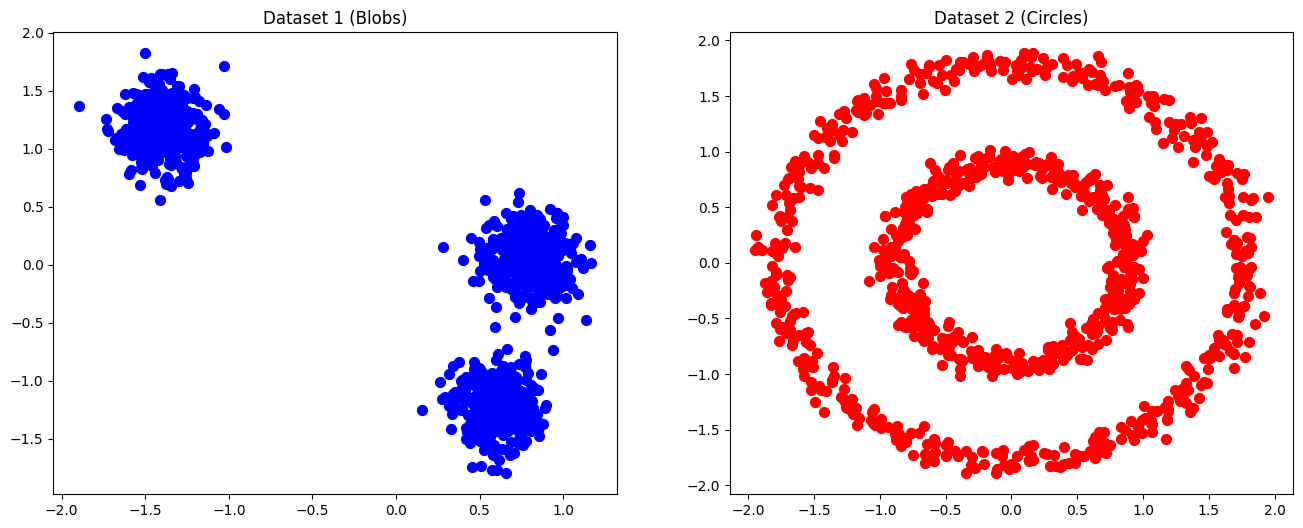

In [4]:
# Plot the datasets
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.scatter(X1_normalized[:, 0], X1_normalized[:, 1], s=50, color='blue')
plt.title('Dataset 1 (Blobs)')

plt.subplot(1, 2, 2)
plt.scatter(X2_normalized[:, 0], X2_normalized[:, 1], s=50, color='red')
plt.title('Dataset 2 (Circles)')

plt.show()

---
### **Observation**
* The dataset 1 shows three well-separated clusters.
* The dataset 2 shows two concentric circular clusters, which are not linearly separable or spherical in shape.
---

## **K-Means Clustering**
---

### **Introduction to K-Means**
K-Means is a popular clustering algorithm that aims to partition the dataset into a pre-defined number of clusters (`k=3` in our case). It works by minimizing the distance between data points and their assigned cluster centers. We use the KMeans class from `sklearn.cluster` to apply this algorithm.
### **Step 1: Define K-Means Function**
We define a function to apply K-Means clustering to any dataset. The function returns the cluster labels for the input data.

In [5]:
# Define a function to apply K-Means clustering
def apply_kmeans(X, k):
    """
    Applies the K-Means clustering algorithm to the dataset.
    
    Parameters:
    X (array-like): The input data that we want to cluster.
    k (int): The number of clusters to form.

    Returns:
    labels_kmeans (array): Array of labels where each data point is assigned to one of the k clusters.
    """
    # Initialize the KMeans object with k clusters and a fixed random state for reproducibility
    kmeans = KMeans(n_clusters=k, random_state=0)
    
    # Fit the model to the data and predict the cluster labels
    labels_kmeans = kmeans.fit_predict(X)
    
    # Return the cluster labels
    return labels_kmeans

### **Step 2: Apply K-Means to Both Datasets**
#### **K = 2**
We apply K-Means with `k=2` to both the blob and circle datasets.



In [6]:
# Apply K-Means to dataset 1
kmeans_labels_1_k2 = apply_kmeans(X1_normalized, k=2)

# Apply K-Means to dataset 2 
kmeans_labels_2_k2 = apply_kmeans(X2_normalized, k=2)

#### **K = 3**
We apply K-Means with `k=3` to both the blob and circle datasets.

In [7]:
# Apply K-Means to dataset 1
kmeans_labels_1_k3 = apply_kmeans(X1_normalized, k=3)

# Apply K-Means to dataset 2 
kmeans_labels_2_k3 = apply_kmeans(X2_normalized, k=3)

### **Step 3: Visualize K-Means Results**
We visualize the clustering results for both datasets using `scatter()`.

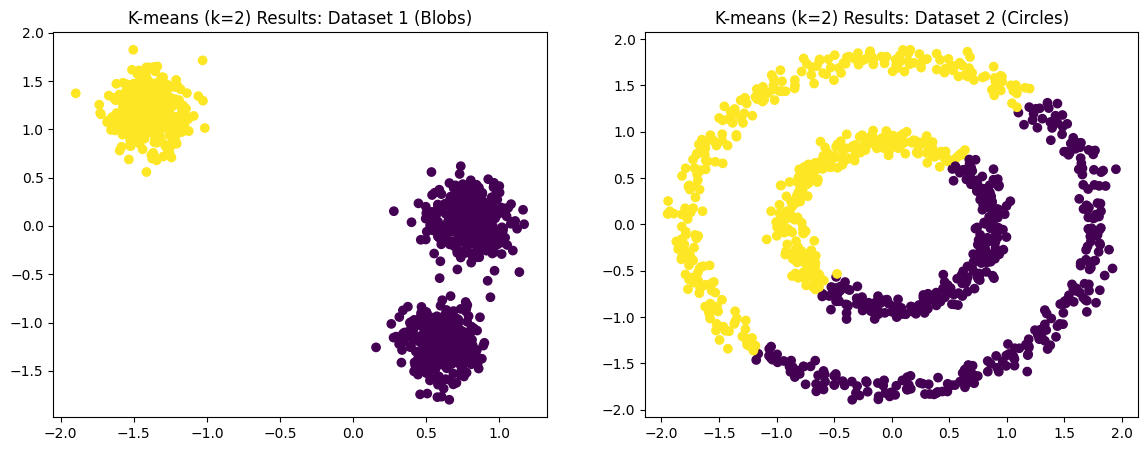

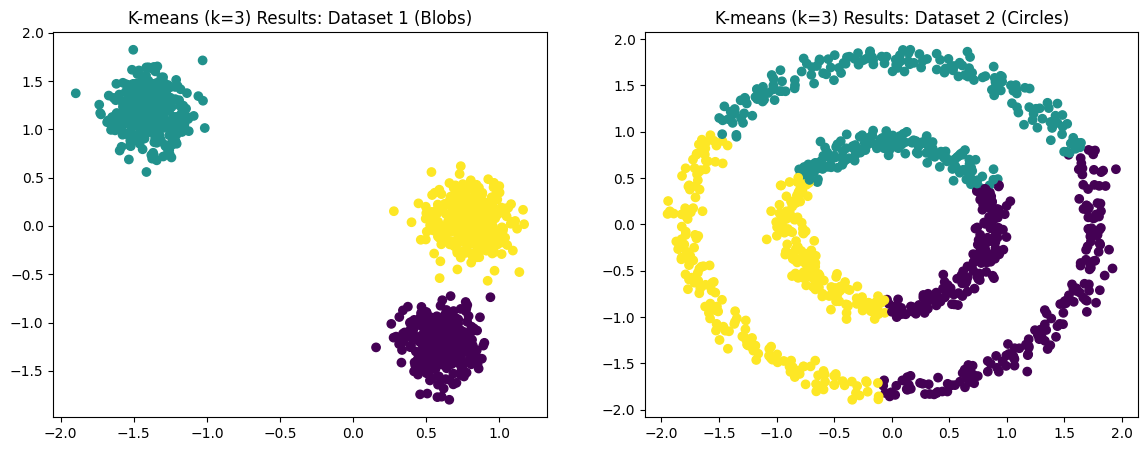

In [8]:
# Plotting KMeans Results
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.scatter(X1_normalized[:, 0], X1_normalized[:, 1], c = kmeans_labels_1_k2, cmap = 'viridis')
plt.title('K-means (k=2) Results: Dataset 1 (Blobs)')

plt.subplot(1, 2, 2)
plt.scatter(X2_normalized[:, 0], X2_normalized[:, 1], c = kmeans_labels_2_k2, cmap = 'viridis')
plt.title('K-means (k=2) Results: Dataset 2 (Circles)')

plt.show()

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.scatter(X1_normalized[:, 0], X1_normalized[:, 1], c = kmeans_labels_1_k3, cmap = 'viridis')
plt.title('K-means (k=3) Results: Dataset 1 (Blobs)')

plt.subplot(1, 2, 2)
plt.scatter(X2_normalized[:, 0], X2_normalized[:, 1], c = kmeans_labels_2_k3, cmap = 'viridis')
plt.title('K-means (k=3) Results: Dataset 2 (Circles)')

plt.show()


---
### **Observation**
**K-Means Performance on Dataset 1 (Blobs):**
- K-Means (with `k=2`) correctly categorized two clusters in the dataset.
- K-Means (with `k=3`) correctly identified the three clusters in the dataset.

**K-Means Performance on Dataset 2 (Circles):**
- Both K-Means with `k=2` and `k=3` failed to capture the circular structure. The algorithm splits the data into clusters, but it cannot capture the circular structure.
- It assigns clusters based on the distance to the centroid, leading to incorrect clustering, where points from both circles are grouped together, cutting through the circles.

---

## **DBSCAN Clustering**

---

### **Introduction to DBSCAN**
DBSCAN is a density-based clustering algorithm that groups points based on the density of data points in a region. It doesn't require specifying the number of clusters beforehand and can identify noise in the data, making it effective for complex, non-linearly separable datasets.

Selecting appropriate values for the parameters `eps` and `min_samples` is crucial, as they control the neighborhood size and density threshold for forming clusters. A smaller `eps` might result in more noise, while a larger `eps` could merge clusters.
* `eps`: The radius within which DBSCAN looks for neighboring points.
* `min_samples`: The minimum number of points required to form a dense region or cluster.

### **Step 1: Define DBSCAN Function**
We define a function to apply DBSCAN to any dataset. The function returns cluster labels, where some points may be labeled as noise.

In [9]:
# Define a function to apply DBSCAN clustering
def apply_DBSCAN(X, eps, min_samp):
    """
    Applies the DBSCAN clustering algorithm to the dataset.
    
    Parameters:
    X (array-like): The input data that we want to cluster.
    eps (float): The radius within which DBSCAN looks for neighboring points.
    min_samp (int): The minimum number of points required to form a dense region or cluster.
    
    Returns:
    labels_dbscan (array): Array of labels where each data point is assigned to a cluster or labeled as noise.
    """
    # Initialize the DBSCAN object with specified eps and min_samples parameters
    dbscan = DBSCAN(eps=eps, min_samples=min_samp)
    
    # Fit the model to the data and predict the cluster labels
    labels_dbscan = dbscan.fit_predict(X)
    
    # Return the cluster labels
    return labels_dbscan

### **Step 2: Apply DBSCAN to Both Datasets**
We apply DBSCAN with `eps=0.15` and `min_samples=4` to both datasets.

In [10]:
# Apply DBSCAN  to dataset 1
dbscan_labels_1 = apply_DBSCAN(X1_normalized, 0.15, 4)

# Apply DBSCAN  to dataset 2
dbscan_labels_2 = apply_DBSCAN(X2_normalized, 0.15, 4)

### **Step 3: Visualize DBSCAN Results**
We visualize the clustering results for both datasets.:

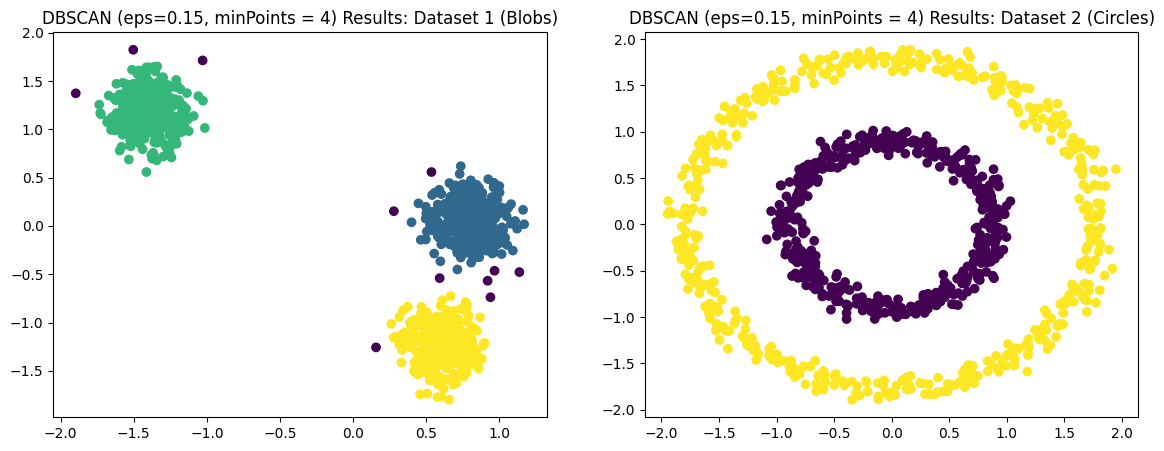

In [11]:
# Plotting DBSCAN Results
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.scatter(X1_normalized[:, 0], X1_normalized[:, 1], c=dbscan_labels_1, cmap='viridis')
plt.title('DBSCAN (eps=0.15, minPoints = 4) Results: Dataset 1 (Blobs)')

plt.subplot(1, 2, 2)
plt.scatter(X2_normalized[:, 0], X2_normalized[:, 1], c=dbscan_labels_2, cmap='viridis')
plt.title('DBSCAN (eps=0.15, minPoints = 4) Results: Dataset 2 (Circles)')

plt.show()

---

### **Observation**
**Performance on Dataset 1 (Blobs):**
- DBSCAN performed well in identifying the three clusters.
- DBSCAN marked some points at the cluster boundaries as noise (indicated by diffrent color (purple)).

**Performance on Dataset 2 (Circles):**
- DBSCAN successfully identified the two concentric circular clusters.
- Due to the tight clustering of points in Dataset 2, DBSCAN did not mark any noise, indicating that the selected algorithm parameters were suitable for detecting the dense cluster structure.

---

## **General Observations**

**K-Means:**
- Worked well on Dataset 1 (Blobs) because the clusters are spherical and well-separated.
- Failed on Dataset 2 (Circles) due to its inability to handle non-convex, complex cluster shapes.

K-Means relies on Euclidean distance to assign points to centroids, making it effective for convex, spherical clusters. However, it fails with non-linearly separable clusters, like those in Dataset 2.


**DBSCAN:**
- Worked well on both Dataset 1 and Dataset 2 because it can find clusters of arbitrary shapes.
- Outlier Detection: DBSCAN was able to detect potential noise or outliers in Dataset 1.

DBSCAN did not mark any noise in Dataset 2 likely due to the tightly packed circular clusters. The parameters were set so that all points were included in the clusters, which is a testament to DBSCAN's strength in managing dense regions without prior knowledge of the number of clusters.



---

## **Conclusion**
In conclusion, K-Means and DBSCAN offer distinct clustering methods. K-Means works well for spherical clusters but struggles with complex shapes, whereas DBSCAN excels in identifying irregular clusters and managing noise. Selecting the appropriate algorithm depends on understanding the dataset, highlighting the need for careful alignment and parameter tuning for optimal results.

---


## **Refrences**
* [Sklearn Documentation](https://scikit-learn.org/)
* [K-means Clustering: Algorithm, Applications, Evaluation Methods, and Drawbacks](https://towardsdatascience.com/k-means-clustering-algorithm-applications-evaluation-methods-and-drawbacks-aa03e644b48a#:~:text=Kmeans%20algorithm%20is%20an%20iterative%20algorithm%20that%20tries%20to%20partition)
* [DBSCAN Clustering](https://www.geeksforgeeks.org/dbscan-clustering-in-ml-density-based-clustering/)
* [DBSCAN vs. K-Means](https://www.geeksforgeeks.org/difference-between-k-means-and-dbscan-clustering/)